# TermProject Final Report

### 2017103955 컴퓨터공학과 권은령

# 1. 중간보고서 수정 사항

```python
upperList=[]
lowerList=[]
for i in range(len(sorted_starDic)):
    find=sorted_starDic[i][0]-1
    if(i<20): # 상위 10퍼센트에 속한다면
        new=copy.copy(games[find])
        new.append(urlList[find]) # url 값까지 넣어줌
        upperList.append(new) # upperList에 순위, 게임 이름, 회사 이름, url 순서로 들어감
    elif(i>=len(sorted_starDic)-20): # 하위 10퍼센트에 속한다면
        new = copy.copy(games[find])
        new.append(urlList[find])  # url 값까지 넣어줌
        lowerList.append(new) # lowerList에 upperList와 같은 순서로 들어감
```

**수정사항 >>**<br>

    중간고사 마지막 문제도 풀어놓고 바보였다...ㅠㅠ
    python의 특성 상, iterable한 값들은 copy 시 메모리 주소 자체를 공유한다는 사실을 깜빡했다..
    기존의 코드는 new=games[find]였다. 따라서 기존의 games[find] 값이 바껴버렸기 때문에, 이후의 코드에서 바뀐 games[find]로 처리되어, 그 결과 url이 두 번 추가되었던 것이다.
    이를 고치기 위해 copy 모듈을 import하였고, new=copy.copy(games[find]), 즉 얕은 복사로 바꿔주었다.

# 2. 추가 사항 - 라이브러리

### 1) [KR-WordRank](https://github.com/lovit/kr-wordrank)

 기존의 WordRank 라이브러리는 중국어와 일본어에 적용되기 위해 만들어진 라이브러리로, 한국어에 적용하기는 어려움이 있다.<br>
 따라서 KR-WordRank라는 라이브러리를 install 하여 리뷰 속의 단어 빈도 수를 체크하기 위해 사용하였다.

# 3. 전체 코드 분석

**프로젝트 중 일부는 Jupyter Notebook이 아닌, Pycharm으로 개발이 진행되었다.<br>
따라서 Pycharm 내에서 개발한 코드는 code가 아닌 'markdown'의 python 형식으로 복사, 붙여넣기하였다.<br>
또한 중간보고서에서 분석하거나 언급한 코드는 최종보고서에서 분석하지 않는다.**

```python
# crawling.py
import csv
from selenium import webdriver
from selenium.webdriver.support.ui import Select
import time
import copy

driver=webdriver.Chrome("/Users/sayqu/Desktop/은령/과제/3-1/웹파/TermProject/chromedriver")
driver.get('https://play.google.com/store/apps/collection/cluster?clp=SnsKGgoUdG9wc2VsbGluZ19mcmVlX0dBTUUQBxgDEgRHQU1FGlcKUW5ld19ob21lX2RldmljZV9mZWF0dXJlZF9yZWNzMl90b3BpY192MV9sYXVuY2hfR0FNRV90b3BzZWxsaW5nX2ZyZWVfR0FNRV8zLTctMy03NBAMGAM%3D:S:ANO1ljLGqtA&gsr=Cn1KewoaChR0b3BzZWxsaW5nX2ZyZWVfR0FNRRAHGAMSBEdBTUUaVwpRbmV3X2hvbWVfZGV2aWNlX2ZlYXR1cmVkX3JlY3MyX3RvcGljX3YxX2xhdW5jaF9HQU1FX3RvcHNlbGxpbmdfZnJlZV9HQU1FXzMtNy0zLTc0EAwYAw%3D%3D:S:ANO1ljIhiZQ')


for i in range(4): # 3번 스크롤을 내리면 전체 랭킹 순위가 다 나오게 됨
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(3)  # 스크롤을 내려 로딩한 값까지 긁어오기 위해서 3초 대기

urlList=[]
details=driver.find_elements_by_class_name('JC71ub')
for item in details:
    url=item.get_attribute("href")
    urlList.append(url)

starDic={}
onlyStarDic={}
path_1='//*[@id="fcxH9b"]/div[4]/c-wiz/div/c-wiz/div/c-wiz/c-wiz/c-wiz/div/div[2]/div['
path_2=']/c-wiz/div/div/div[2]/div/div/div[2]/div/div/div/div'
for i in range(1, 51):
    stars=driver.find_element_by_xpath(path_1+str(i)+path_2)
    star = stars.get_attribute("aria-label")
    starDic[i]=float(star[10:13])+10-((i-1)*0.025) # 1~50위
    onlyStarDic[i]=float(star[10:13])

path_1='//*[@id="fcxH9b"]/div[4]/c-wiz/div/c-wiz/div/c-wiz/c-wiz/c-wiz/div/div[2]/c-wiz['
path_2=']/div/div/div[2]/div/div/div[2]/div/div[1]/div/div'
for i in range(1, 151):
    stars=driver.find_element_by_xpath(path_1+str(i)+path_2)
    star = stars.get_attribute("aria-label")
    starDic[50+i]=float(star[10:13])+10-((50+i-1)*0.025) # 51~200위
    onlyStarDic[50+i] = float(star[10:13])
sorted_starDic=sorted(starDic.items(), key=lambda x:x[1], reverse=True)
sorted_onlyStarDic=sorted(onlyStarDic.items(), key=lambda x:x[1], reverse=True)

ranks=driver.find_elements_by_class_name("kCSSQe")
rank_dictionary={}
for item in ranks:
    if(item.text!=''):
        rankList=item.text.split('\n')
        rank_dictionary[rankList[0]] = rankList[1]
    # rankList에다가 게임 이름과 회사를 각각 0과 1 인덱스에 저장
    # 그 후 rank_dictionary에 추가 (게임 이름이 key, 회사가 value)

games=[]
count=1
for k, v in rank_dictionary.items():
    newList=[count, k, v]
    games.append(newList) # rank_dictionary의 items를 list로 만들어줌
    count+=1

with open('Game_Rank_List.csv', 'w', encoding='UTF8') as fileWrite:
    myWriter=csv.writer(fileWrite)
    for i in range(len(games)):
        myWriter.writerow(games[i])

upperList=[]
lowerList=[]
for i in range(len(sorted_starDic)):
    find=sorted_starDic[i][0]-1
    if(i<20): # 상위 10퍼센트에 속한다면
        new=copy.copy(games[find])
        new.append(urlList[find]) # url 값까지 넣어줌
        upperList.append(new) # upperList에 순위, 게임 이름, 회사 이름, url 순서로 들어감
    elif(i>=len(sorted_starDic)-20): # 하위 10퍼센트에 속한다면
        new = copy.copy(games[find])
        new.append(urlList[find])  # url 값까지 넣어줌
        lowerList.append(new) # lowerList에 upperList와 같은 순서로 들어감

with open('Game_Rank_upperList.csv', 'w', encoding='UTF8') as fileWrite:
    myWriter=csv.writer(fileWrite)
    for i in range(len(upperList)):
        myWriter.writerow(upperList[i])

with open('Game_Rank_lowerList.csv', 'w', encoding='UTF8') as fileWrite:
    myWriter=csv.writer(fileWrite)
    for i in range(len(lowerList)-1, -1, -1):
        myWriter.writerow(lowerList[i])


star_upperList=[]
star_lowerList=[]
for i in range(len(sorted_onlyStarDic)):
    find=sorted_onlyStarDic[i][0]-1 # x위는 games의 x-1번째에 위치하기 때문
    if(i<20): # 상위 10퍼센트에 속한다면
        new=copy.copy(games[find])
        new.append(sorted_onlyStarDic[i][1])
        new.append(urlList[find]) # url 값까지 넣어줌
        star_upperList.append(new) # upperList에 순위, 게임 이름, 회사 이름, url 순서로 들어감
    elif(i>=len(sorted_onlyStarDic)-20): # 하위 10퍼센트에 속한다면
        new = copy.copy(games[find])
        new.append(sorted_onlyStarDic[i][1])
        new.append(urlList[find])  # url 값까지 넣어줌
        star_lowerList.append(new) # lowerList에 upperList와 같은 순서로 들어감


with open('Game_Rank_Star_upperList.csv', 'w', encoding='UTF8') as fileWrite:
    myWriter=csv.writer(fileWrite)
    for i in range(len(star_upperList)):
        myWriter.writerow(star_upperList[i])

with open('Game_Rank_Star_lowerList.csv', 'w', encoding='UTF8') as fileWrite:
    myWriter=csv.writer(fileWrite)
    for i in range(len(star_lowerList)-1, -1, -1):
        myWriter.writerow(star_lowerList[i])
```

In [4]:
import pandas

rank=pandas.read_csv('Game_Rank_List.csv', names=['순위', '게임 이름', '회사 이름'])
pandas.set_option('display.max_rows', 200)
rank

,순위,게임 이름,회사 이름
0,1,일곱 개의 대죄: GRAND CROSS,Netmarble
1,2,궁수의 전설,Habby
2,3,Draw it,Kwalee Ltd
3,4,랑그릿사,ZlongGames
4,5,브롤스타즈,Supercell
5,6,아르카,"GAMELAND(HK)CO.,LIMITED"
6,7,각성:최후의 구원자,funny game korea
7,8,Run Race 3D,Good Job Games
8,9,최후의 희망: Pixel Z,Leiting Games
9,10,House Paint,SayGames


총 랭킹 리스트를 정리한 csv 파일이다. 순위, 게임 이름, 회사 이름 순서로 정리되어있다.<br>
1위부터 200위까지 랭킹을 볼 수 있다.
**[2019-06-09 오후 09:53 기준]**

In [5]:
rank_upper=pandas.read_csv('Game_Rank_upperList.csv', names=['순위', '게임 이름', '회사 이름', 'url'])
rank_upper

,순위,게임 이름,회사 이름,url
0,4,랑그릿사,ZlongGames,https://play.google.com/store/apps/details?id=...
1,1,일곱 개의 대죄: GRAND CROSS,Netmarble,https://play.google.com/store/apps/details?id=...
2,5,브롤스타즈,Supercell,https://play.google.com/store/apps/details?id=...
3,2,궁수의 전설,Habby,https://play.google.com/store/apps/details?id=...
4,12,공장 주식회사,Cheetah Games,https://play.google.com/store/apps/details?id=...
5,10,House Paint,SayGames,https://play.google.com/store/apps/details?id=...
6,11,Crowd City,VOODOO,https://play.google.com/store/apps/details?id=...
7,17,탈출 또는 억압,Clicker FunTime,https://play.google.com/store/apps/details?id=...
8,15,토킹톰 히어로 대시,Outfit7 Limited,https://play.google.com/store/apps/details?id=...
9,3,Draw it,Kwalee Ltd,https://play.google.com/store/apps/details?id=...


별점과 랭킹 순위를 이용해 매긴 순위 중, 최상 10% 중에서 점수가 높은 순서대로 정렬하였다.<br>
인기차트 순위, 게임 이름, 회사 이름, url 순서대로 정리되어있다.

In [6]:
rank_lower=pandas.read_csv('Game_Rank_lowerList.csv', names=['순위', '게임 이름', '회사 이름', 'url'])
rank_lower

,순위,게임 이름,회사 이름,url
0,196,트라하,NEXON Company,https://play.google.com/store/apps/details?id=...
1,189,크레이지아케이드 BnB M,NEXON Company,https://play.google.com/store/apps/details?id=...
2,188,리니지M,NCSOFT Corporation,https://play.google.com/store/apps/details?id=...
3,200,Merge Tower Bots,Hyper Mania,https://play.google.com/store/apps/details?id=...
4,199,이사만루2019,Netmarble,https://play.google.com/store/apps/details?id=...
5,194,한게임 신맞고 : 김준현이 선택한 원조 고스톱,NHN Starfish,https://play.google.com/store/apps/details?id=...
6,153,황제라 칭하라,"Clicktouch Co.,Ltd.",https://play.google.com/store/apps/details?id=...
7,195,매드탱크,MadMans,https://play.google.com/store/apps/details?id=...
8,191,마법의 소라고둥,Whoing Soft(후잉 소프트),https://play.google.com/store/apps/details?id=...
9,197,로드 모바일: 제국의 전쟁 - MMORPG,IGG.COM,https://play.google.com/store/apps/details?id=...


별점과 랭킹 순위를 이용해 매긴 순위 중, 최하 10% 중에서 점수가 높은 순서대로 정렬하였다.<br>
인기차트 순위, 게임 이름, 회사 이름, url 순서대로 정리되어있다.

In [7]:
starRank_upper=pandas.read_csv('Game_Rank_Star_upperList.csv', error_bad_lines=False, names=['순위', '게임 이름', '회사 이름', '별점', 'url'])
starRank_upper

,순위,게임 이름,회사 이름,별점,url
0,4,랑그릿사,ZlongGames,4.8,https://play.google.com/store/apps/details?id=...
1,161,Eternium (이터니움),"Making Fun, Inc.",4.8,https://play.google.com/store/apps/details?id=...
2,1,일곱 개의 대죄: GRAND CROSS,Netmarble,4.7,https://play.google.com/store/apps/details?id=...
3,31,Empires & Puzzles: RPG Quest,Small Giant Games,4.7,https://play.google.com/store/apps/details?id=...
4,46,Soul Knight,ChillyRoom,4.7,https://play.google.com/store/apps/details?id=...
5,47,Snowball.io,"Geisha Tokyo, Inc.",4.7,https://play.google.com/store/apps/details?id=...
6,48,Piano Tiles 2™,Cheetah Games,4.7,https://play.google.com/store/apps/details?id=...
7,102,갤럭시 슈터 - 팔콘 스쿼드 - 외계인 슈팅게임,ONESOFT,4.7,https://play.google.com/store/apps/details?id=...
8,103,Dream Piano - Music Game,Tap Lab,4.7,https://play.google.com/store/apps/details?id=...
9,121,Merge Plane - Click & Idle Tycoon,Merger Games,4.7,https://play.google.com/store/apps/details?id=...


별점만을 이용해 매긴 순위 중, 최상 10% 중에서 별점이 높은 순서대로 정렬하였다.<br>
인기차트 순위, 게임 이름, 회사 이름, url 순서대로 정리되어있다.<br>

In [8]:
starRank_lower=pandas.read_csv('Game_Rank_Star_lowerList.csv', error_bad_lines=False, names=['순위', '게임 이름', '회사 이름', '별점', 'url'])
starRank_lower

,순위,게임 이름,회사 이름,별점,url
0,43,Aquapark Slide.io,Xahit Game Studio,1.6,https://play.google.com/store/apps/details?id=...
1,83,시크릿 펫,Ttgame,2.5,https://play.google.com/store/apps/details?id=...
2,27,Cowboy!,Lion Studios,2.7,https://play.google.com/store/apps/details?id=...
3,196,트라하,NEXON Company,3.1,https://play.google.com/store/apps/details?id=...
4,153,황제라 칭하라,"Clicktouch Co.,Ltd.",3.1,https://play.google.com/store/apps/details?id=...
5,79,Cut It,Lion Studios,3.2,https://play.google.com/store/apps/details?id=...
6,88,프렌즈마블,Kakao Games Corp.,3.3,https://play.google.com/store/apps/details?id=...
7,37,Box Simulator for Brawl Stars: Open That Box!,Slayd Elers,3.4,https://play.google.com/store/apps/details?id=...
8,18,Folding Blocks,Popcore Games,3.4,https://play.google.com/store/apps/details?id=...
9,189,크레이지아케이드 BnB M,NEXON Company,3.5,https://play.google.com/store/apps/details?id=...


별점만을 이용해 매긴 순위 중, 최하 10% 중에서 별점이 높은 순서대로 정렬하였다.<br>
인기차트 순위, 게임 이름, 회사 이름, url 순서대로 정리되어있다.

별점만을 이용하여 매긴 순위를 기반으로 리뷰 분석을 해야할 지, 아니면 인기차트 순위까지 반영한 순위를 기반으로 리뷰 분석을 해야할 지 고민이었다.<br>

우선 처음에는 별점만을 이용해 매긴 순위를 기반으로 코드를 짜보았다. 이 리스트에는 인기차트 순위가 낮은 게임들이 많았다.<br>
별점이 높은 경우를 예로 들어보면, 리뷰의 개수가 적으면서 별점이 높은 게임들만 가득했다.<br>
최악의 경우에는 별점 5점짜리 리뷰 1개를 가지고 있는 게임도 있었다.<br>
이는 상대적으로 형평성이 떨어진다 생각해, 결국 후자를 선택했다.

```python
#showDetail.py
from openpyxl import Workbook
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
import time
```

### 코드 분석 >>
excel을 이용하기 위해 openpyxl을 import 해주었다.<br>
오류 예외처리를 위해 해당 element가 없는 경우 발생하는 NoSuchElementException을 import 해주었다.<br>

```python
class ReviewAnalyzing:
    def __init__(self, fileName, sheetName):
        self.fileName=fileName
        self.sheetName=sheetName
        self.urlList=[]
```

### 코드 분석 >>
    리뷰 분석을 위한 클래스이다.
    fileName은 리뷰 분석을 위해 접근해야할 url들을 담고있는 csv 파일의 이름을 뜻한다.
    sheetName은 excel 파일에 리뷰를 저장할 sheet의 이름이다.
    urlList에 리뷰 분석을 위해 접근해야할 url들을 리스트로 저장한다.

```python
    def MakeUrlList(self):
        with open(self.fileName, 'r', encoding="utf8") as fileRead:
            for lineContent in fileRead:
                if (lineContent != '\n'):  # 줄넘김 문자는 제외
                    self.urlList.append(lineContent[lineContent.find("https://"):].strip('\n'))
                    # 게임 이름이나 회사 중간에 ','가 들어있는 경우 때문에 split(',')으로는 구분 불가능
```

### 코드 분석 >>
    urlList에 url들을 추가하는 함수이다.
    입력받아온 fileName을 통해 해당 파일을 열고, 한 줄씩 읽어온다.
    게임 순위, 게임 이름, 회사 이름, urlList 순서로 저장되어 있기 때문에 split(',')를 한 뒤 3번째 index에 접근했더니, 게임 이름이나 회사 이름 중간에 ','가 들어가있는 경우 때문에 오류가 발생했다.
    따라서 https://로 시작하는 게임 이름이나 회사는 없기 때문에 이를 찾아서 주소를 urlList에 저장했다.

```python
    def GetReview(self):
        count = 0
        reviewNum = 1
        path_1 = '//*[@id="fcxH9b"]/div[4]/c-wiz/div/div[2]/div/div[1]/div/div/div[1]/div[2]/div/div['
        path_review = ']/div/div[2]/div[2]/span[1]'
        path_allReview = ']/div/div[2]/div[2]/span[2]'

        while count < len(self.urlList):
            driver.get(self.urlList[count] + '&showAllReviews=true')

            for i in range(4):
                driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
                time.sleep(3)  # 스크롤을 내려 로딩한 값까지 긁어오기 위해서 3초 대기

            for i in range(1, 201):
                try:
                    driver.find_element_by_xpath(path_1 + str(i) + path_review + "/div/button")
                    display = driver.find_element_by_xpath(path_1 + str(i) + path_allReview)
                    ws['A' + str(reviewNum)] = display.get_attribute('textContent')
                    reviewNum += 1
                except NoSuchElementException:
                    try:
                        display = driver.find_element_by_xpath(path_1 + str(i) + path_review)
                        ws['A' + str(reviewNum)] = display.text
                        reviewNum += 1
                    except NoSuchElementException:
                        break
            count += 1
```

### 코드 분석 >>
    urlList에 저장되어있는 url에 차례로 접근하여 해당 게임의 리뷰들을 받아오는 함수이다.
    각 게임의 최대 리뷰 수는 '더 보기'를 누르지 않는 이상 스크롤을 최대한 내리면 200개이다.
    따라서 각 게임 당 최대 200개를 받아오기 위해 for문의 범위를 설정하였다.
    리뷰가 로딩되는 시간을 기다리기 위해서 각각 3초씩 대기하였다.

    우선 각 리뷰도 일정 문자 수를 벗어나면 '리뷰 더 보기' 버튼이 생성된다.
    따라서 우선 이 버튼이 있나 없나를 조사하기 위해 try한다.
    만약 해당 버튼이 없다면 NoSuchElementException 오류가 발생하여, 아래 코드로 넘어간다.

    아래 코드의 경우에는 해당 리뷰를 가져와 엑셀에 순서대로 기입한다.
    만약 리뷰가 더이상 존재하지 않는다면 가장 아래에 있는 except 코드로 넘어가서, for문을 빠져나오고 다음 게임으로 넘어간다.

    다시 try 구문으로 돌아가면, 숨겨져있는 긴 리뷰를 받아오기 위해 get_attribute 메소드를 사용하였다.
    아래와 마찬가지로 받아온 리뷰를 엑셀에 순서대로 기입한다.
    for문을 다 돌거나 벗어나면, 다음 게임으로 넘어간다.

```python
driver=webdriver.Chrome("/Users/sayqu/Desktop/은령/과제/3-1/웹파/TermProject/chromedriver")
wb=Workbook()

upperReview=ReviewAnalyzing("Game_Rank_upperList.csv", 'UpperList')
upperReview.MakeUrlList()
ws=wb.create_sheet(upperReview.sheetName, 0)
upperReview.GetReview()

lowerReview=ReviewAnalyzing("Game_Rank_lowerList.csv", 'LowerList')
lowerReview.MakeUrlList()
ws=wb.create_sheet(lowerReview.sheetName, 0)
lowerReview.GetReview()

wb.save('Review.xlsx')
```

### 코드 분석 >>
    excel 파일을 만들기 위하여 Workbook의 객체인 wb를 생성해주었다.
    또한 위에서 만든 ReviewAnalyzing class의 객체인 upperReview를 생성하였다.
    fileName은 "Game_Rank_upperList.csv", sheetName은 'UpperList'이다.
    이 객체로 MakeUrlList 메소드를 실행해 urlList를 생성한다.
    위에서 만든 wb를 이용해 upperReview의 sheetName을 가지는 sheet를 생성해 ws에 저장한다.
    GetReview 메소드에서 위에서 생성한 UpperList sheet A열의 각 cell에 리뷰를 저장한다.

    upperReview와 같은 방식으로 fileName은 "Game_Rank_lowerList.csv"이고 sheetName은 'LowerList'인 lowerReview 객체를 생성한다.
    마찬가지로 MakeUrlList 메소드와 GetReivew 메소드를 통해 LowerList sheet A열의 각 cell에 리뷰를 저장한다.

### 결과 >>
    upperList에서 수집한 리뷰의 개수는 3703개, lowerList에서 수집한 리뷰의 개수는 3681개이다.
    -> 각각의 게임이 전부 200개 이상의 리뷰를 가지고 있다면 각각 총 리뷰의 수가 4000개이겠지만, 해당 게임의 전체 리뷰 수가 200개가 되지 않는 게임들이 몇몇 존재해 초기 목표였던 4000개씩, 총 8000개를 만족하지 못했다.

In [24]:
with open("stopword.txt", 'r')as fileRead:
    stopwordSet=set()
    line=fileRead.readline()
    while line:
        stopwordSet.add(line.strip())
        line=fileRead.readline()
        
print(stopwordSet)

{'있습니다', '아이', '이렇게', '그래', '그런데', '있어요', '되는', '무조건', '해도', '있으면', '이게', '이거', '계속', '그리고', '완전', '없는', '다만', '같아요', '있어', '하는', '너무', '들어', '있다', '하다', '하고', '다른', '때문에', '있고', '해서', '했는데', '갑자기', '있는', '합니다', '아주', '내가', '많이', '에서', '이제', '게임', '하면', '제가', '하지만', '어떻게', '그래서', '그런', '까지', '없고', '엄청', '이번', '저도', '그냥', '진짜', '같습니다', '입니다', '아직', '일단', '지금', '바로', '저는', '아님', '해야', '근데', '이건', '이미', '이런'}


### 코드 분석 >>
    리뷰에서 뽑아낼 키워드 중 제외할 단어들이다.
    필요없는 문장 시작 시 주어(제가, 저는, 저도), 접속어(그래서, 다만, 그리고, 하지만), 기본 동사(있어, 같습니다, 있습니다, 입니다), 긍정/부정이 담겨있지 않은 강조 용의 부사(무조건, 엄청, 진짜, 바로, 아직), 지시어(이건, 이번, 이거, 이런), 그 외(에서, 까지...)를 제외한다. 또한 게임이 너무 압도적으로 많이 언급되어 제외했다.

In [26]:
from openpyxl import load_workbook

load_wb=load_workbook("Review.xlsx")
load_ws=load_wb['UpperList']

upperList=[]
for row in load_ws.rows:
    for cell in row:
        upperList.append(cell.value)

        
        
load_ws=load_wb['LowerList']

lowerList=[]
for row in load_ws.rows:
    for cell in row:
        lowerList.append(cell.value)

### 코드 분석 >>
    Review excel 파일에 있는 sheet 안의 cell에 저장되어 있는 값을 읽어와 각 list에 저장한다.
    UpperList sheet에 있는 리뷰 각각은 upperList에, LowerList sheet에 있는 리뷰 각각은 lowerList에 저장한다.

In [27]:
from krwordrank.word import KRWordRank
from krwordrank.hangle import normalize
from krwordrank.sentence import summarize_with_sentences

wordrank_extractor = KRWordRank(min_count = 5, max_length = 10, verbose = True)

print("\n# UpperList")
upperReviews=[normalize(text, english=False, number=False) for text in upperList]

upperWords, sents=summarize_with_sentences(upperReviews, diversity=0.5,
    num_keywords=100, num_keysents=3, stopwords=stopwordSet, verbose=False)
for word, r in sorted(upperWords.items(), key=lambda x:x[1], reverse=True):
    print('%8s:\t%3.3f' % (word, r))

print("\n\n# LowerList: ")
lowerReviews=[normalize(text, english=False, number=False) for text in lowerList]

lowerWords, sents=summarize_with_sentences(lowerReviews, diversity=0.5,
    num_keywords=100, num_keysents=3, stopwords=stopwordSet,verbose=False)
for word, r in sorted(lowerWords.items(), key=lambda x:x[1], reverse=True):
    print('%8s:\t%3.3f' % (word, r))


# UpperList
      광고:	28.363
      정말:	23.878
      재미:	18.402
      아니:	16.700
      재밌:	15.405
      다시:	12.438
     플레이:	11.262
    업데이트:	9.002
      제발:	8.621
      사람:	8.163
      시간:	7.637
      현질:	7.601
      좋은:	7.440
      만들:	7.124
    해주세요:	6.910
      조금:	6.806
     캐릭터:	6.748
    스테이지:	6.642
      빨리:	6.137
      나오:	6.037
      좋아:	6.012
      생각:	6.010
      같은:	5.925
     에너지:	5.239
      무슨:	5.140
      렉이:	5.069
      처음:	5.015
     난이도:	4.911
      한번:	4.777
      좋겠:	4.756
      유저:	4.743
      문제:	4.626
      많은:	4.587
      고쳐:	4.349
      자꾸:	4.333
      하나:	4.294
     모바일:	4.245
      안되:	4.183
      짜증:	4.176
      없어:	4.114
      감사:	4.102
    제작자님:	3.947
      레벨:	3.928
     스토리:	3.795
      브롤:	3.685
      친구:	3.677
      한판:	3.674
      배그:	3.628
      보고:	3.581
    랑그릿사:	3.571
      좋고:	3.391
      보상:	3.281
      않고:	3.214
     솔직히:	3.212
      못하:	3.200
      이상:	3.129
      시작:	3.088
      부탁:	3.080
      보석:	3.073
      모르:	3.066
    로블록스:	3.021
    

### 코드 분석 >>
    리뷰 분석을 위해 library KR-WordRank를 import 하였다.
    우선 normalize 함수를 이용해 리뷰 중 영어와 숫자를 모두 제외한다.(단어로 취급x)
    -> 어쩐지 갑자기 upperReviews에서 오류가 생겨서 주석 처리했다..
    그 다음 summarize_with_sentences 함수를 통해 리뷰 리스트 중 가장 많이 쓰인 100개의 키워드를 추출한다.
    그 후 해당 키워드와 그 키워드가 전체 단어 중 차지하는 비율을 표시한다.

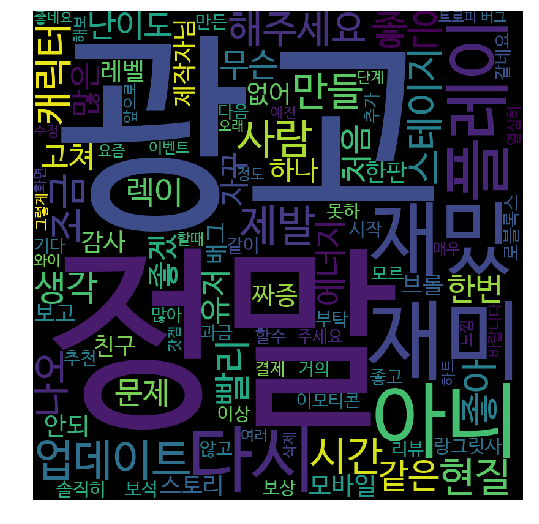

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc=WordCloud(font_path='NanumBarunGothic.ttf', width=800, height=800)
wc=wc.generate_from_frequencies(upperWords)
upperArray=wc.to_array()

fig=plt.figure(figsize=(9, 9))
plt.imshow(upperArray)
plt.axis('off')
plt.show()
fig.savefig('upperWords_wordcloud.png')

### 결과 분석 >>
1. `정말` `재밌` `재미` `좋은` `감사`와 같은 긍정적인 단어가 상대적으로 크게 표시되어있다.
2. 가설 (2)에 가정했던 것처럼, `캐릭터` `플레이` `스토리` `스테이지` 등의 단어가 언급되었다.
3. 반면 예상과 달리 `광고` `현질` `과금` `아니` `짜증`과 같은 부정적인 단어가 언급되었다. 이는 4. 한계점에서 다루겠다.
4. `제작자님` `해주세요` `좋겠습니다` `빨리` `버그`와 같은 단어를 보면, 요구사항을 게임 리뷰에서 많이 언급한다는 사실을 알게되었다.

    유저들은 빠른 버그 픽스를 원한다. 또한 상위의 게임들도 광고나 과금, 뽑기 시스템을 많이 차용하고 이는 유저들의 불편함을 야기한다. 그리고 4번 내용을 참고해, 게임 출시 후 유저들의 리뷰를 통해 게임의 버그를 찾고, 요구사항들을 정리해서 업데이트에 반영해야겠다는 생각이 들었다.

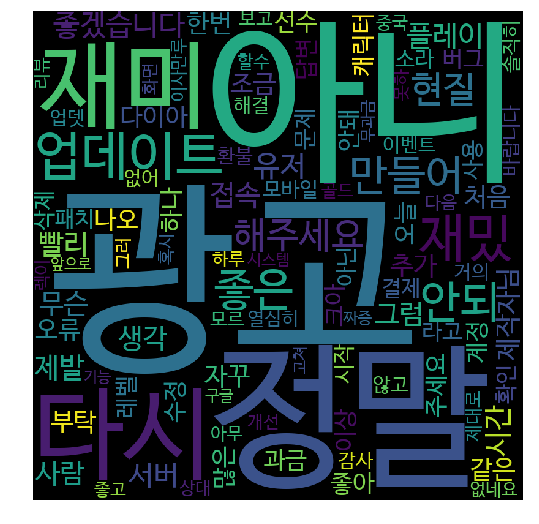

In [29]:
%matplotlib inline

wc=WordCloud(font_path='NanumBarunGothic.ttf', width=800, height=800)
wc=wc.generate_from_frequencies(lowerWords)
lowerArray=wc.to_array()

fig=plt.figure(figsize=(9, 9))
plt.imshow(lowerArray)
plt.axis('off')
plt.show()
fig.savefig('lowerWords_wordcloud.png')

### 결과 분석 >>
1. `광고` `아니` `안되` `안돼` `현질`과 같은 부정적 단어가 상대적으로 크게 표시되었다.
2. `재밌` `재미`와 같은 긍정적 단어도 크게 표시되기도 했다.
3. `다이아` `골드` `환불` `현질` `과금`과 같이 과금 요소와 관련된 단어들이 많이 언급되었다.
4. 상위 리뷰들과 마찬가지로 `해주세요` `제작자님` `좋겠습니다` `빨리` `버그` `해결`와 같은 요구의 의미가 담긴 단어가 많이 언급되었다.


    욕설이 순위에 없어서 필터링 할 필요가 없었다는 점이 놀라웠다. 아마 최소 count를 5로 설정하기도 했고, 워낙 우리나라에는 다양한 욕설이 많아서 그렇지 않을까싶다...
    또한 가설과 마찬가지로 역시나 과금 요소와 관련된 내용들이 많이 언급되었다.

# 4. 한계점

#### 1) 최근 출시된 게임이 인기 차트의 상위 부분을 차지
 - 최근 출시된 게임에는 리뷰 알바가 굉장히 많았다... 예를 들어 `일곱개의 대죄` 게임은 출시가 다음 날인데 그 전 날에 별점 5점 리뷰들이 가득했다.

#### 2) 리뷰 내용과 상반되는 별점
 - 별점을 높게 주면 리뷰 상단에 고정되어 게임을 설치하려는 다른 유저들이나 게임 개발사가 볼 수 있다는 사실을 알고, 게임의 안 좋은 점을 가득 적고 별점을 5점 주는 유저들이 많았다.<br>
 - 이 유용한 리뷰 순으로 정리 때문에 리뷰 분석이 안정적이지 않았다..
 
#### 3) 의미 없는 리뷰들
 - 흔히 게임 내에서 리뷰를 남기면 보상을 주는 시스템을 차용한다. 이 때문에 의미없는 리뷰 내용(ex: ㅏ, ㅇㅇㅇ, 굿, 잼씀)과 함께 높은 별점을 주는 유저들이 많았다. 이러한 리뷰들로 인해 평균 별점이 높아졌다.

#### 4) 업데이트를 최근에 했는가, 하지 않았는가의 차이
 - 출시된 지 꽤 되어 유저들이 많이 존재하고, 최근 업데이트를 진행한 게임(ex: `하스스톤`)들의 업데이트가 만족스럽지 못하면, 리뷰 폭탄이 쏟아졌다... 이러한 최근 리뷰들이 상단에 고정되어, 평균 별점과 상반되게 나올 때도 있었다.
 
등과 같은 이유들 때문에 객관적인 결과가 나오지 않아 조금은 아쉽다.

# 5. 소감

    역시 어떤 소프트웨어이든 간에, 유지보수가 압도적으로 중요하다는 사실을 다시금 깨닫게 됐다. 모든 유저들은 지속적인 업데이트를 원하고 있었고, 빠른 버그 픽스와 요구사항의 반영을 원했다.
    또한 좋은 게임이면 좋은 게임인대로 더 많은 스테이지, 더 많은 캐릭터 등의 업데이트를 원했고 나쁜 게임이면 나쁜 게임인대로 시스템 수정, 스토리 개선, 광고 제거 등의 업데이트를 원했다.

    그리고 두 결과 모두 '아니'가 압도적인 이유가, 리뷰를 대충 훑어봐도 부정적인 이야기를 시작하기 전에 흔히 SNS에 떠돌아다녔던 내용처럼 '아니'라고 시작하는 리뷰들이 많았던 것 때문도 있다. 리뷰 데이터 분석을 하는 나라의 언어적 특성에 따라서도 이와 같이 결과가 나뉠 것 같다.

    특히 유저들이 가장 많은 반응을 보인 건 `광고`였다. 현재 개발 중인 게임을 출시하게 되면 게임 하단부에 광고를 넣을 생각이었는데, 그보다는 에너지 시스템과 광고를 결합하여 자연스럽게 광고를 제공하는 것이 나을 것 같다는 생각을 했다.
    
    평소 관심있던 게임 개발이 아니라, 새로운 분야인 데이터 분석을 한 학기동안 진행하니, 새로운 점이 매우 많았다. 게임 개발은 그 때 그 때 바로 시각화된 결과를 볼 수 있어 수정이 간편하지만, 데이터 분석은 마지막까지 어떤 최종 결과가 나올지 알 수 없어 불안했다. 그래도 한 학기동안 나에게 의미있는 프로젝트를 진행한 것 같아 뿌듯하다.

# 6. 참고문헌

https://yizeng.me/2014/04/08/get-text-from-hidden-elements-using-selenium-webdriver/, web에서 invisible content 얻는 법<br>
http://www.hanul93.com/openpyxl-basic/, python으로 엑셀 작성하기<br>
https://lovit.github.io/nlp/2018/04/17/word_cloud/, KR-WordRank, wordcloud 참고